In [53]:
%matplotlib inline
from rswarp.utilities.file_utils import readparticles, loadparticlefiles
from rswarp.utilities.beam_analysis import *
from matplotlib import pyplot as plt
import numpy as np
import h5py
import os

In [54]:
#Import phase space data from all steps. Uses readparticles()
stepArrays = loadparticlefiles('diags/xySlice/hdf5/')
steps = stepArrays.keys()
steps.sort()

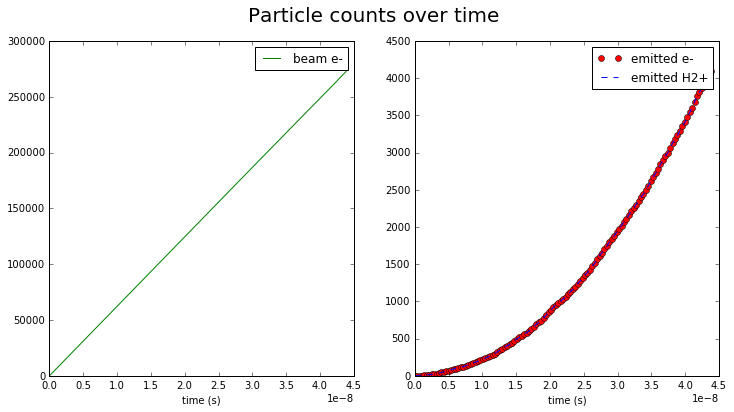

In [39]:
eleccount = [len(stepArrays[s]['e-']) for s in steps]
emiteleccount = [len(stepArrays[s]['emitted e-']) for s in steps]
h2pcount = [len(stepArrays[s]['H2+']) for s in steps]
t = [stepArrays[s]['time'] for s in steps]

fig = plt.figure(figsize=(12,6))
plt.suptitle('Particle counts over time',fontsize=20)

plt.subplot(121)
plt.plot(t,eleccount,'g-', label='beam e-')
plt.xlabel('time (s)')
plt.legend()

plt.subplot(122)
plt.plot(t,emiteleccount,'ro', label='emitted e-')
plt.plot(t,h2pcount,'b--', label='emitted H2+')
plt.xlabel('time (s)')
plt.legend()


plt.show()

In [42]:
filteredsteps = steps[::30]
elecdata = [convertunits(stepArrays[s]['e-']) for s in filteredsteps]
emitelecdata = [convertunits(stepArrays[s]['emitted e-']) for s in filteredsteps]
h2pdata = [convertunits(stepArrays[s]['H2+']) for s in filteredsteps]
times = [stepArrays[s]['time'] for s in filteredsteps]
print("Length of data: %i steps, from %.2E to %.2E s" % (len(times),times[0],times[-1]))

Length of data: 5 steps, from 3.60E-11 to 4.35E-08 s


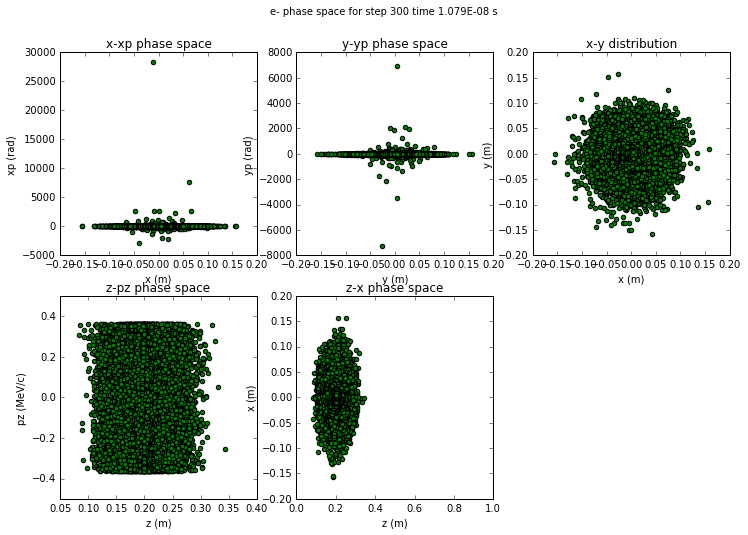

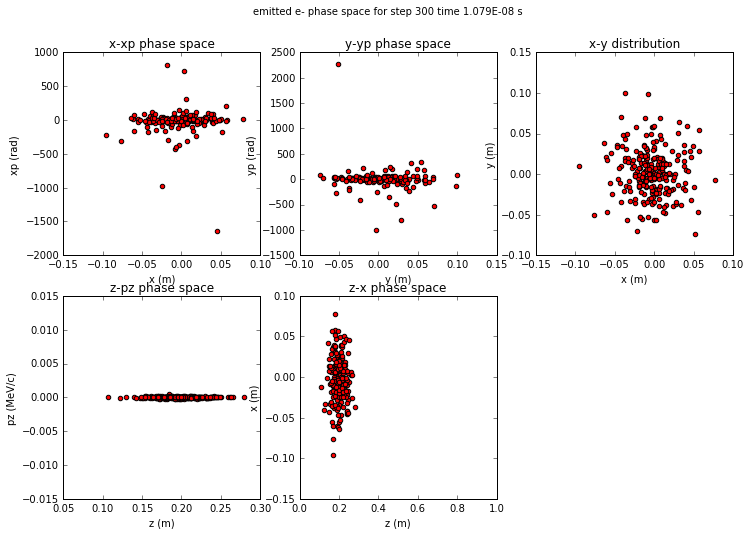

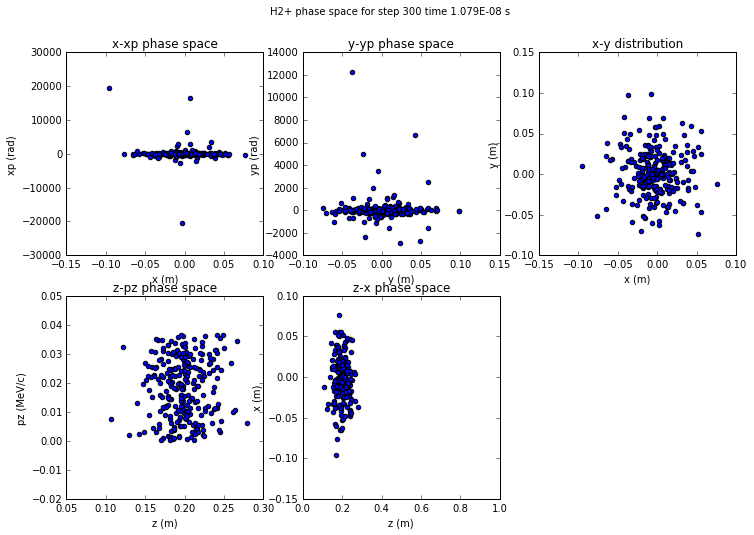

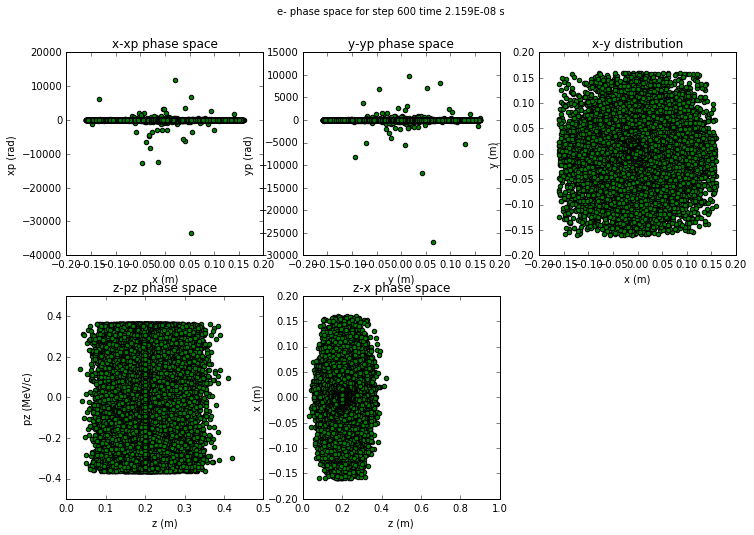

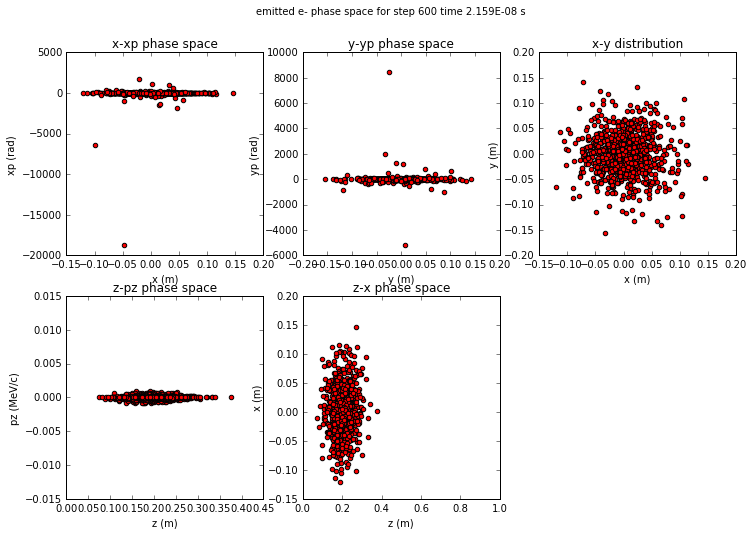

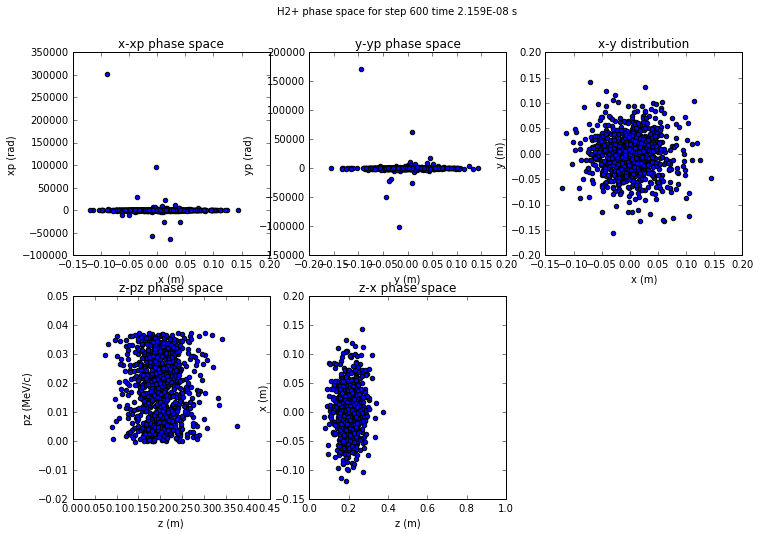

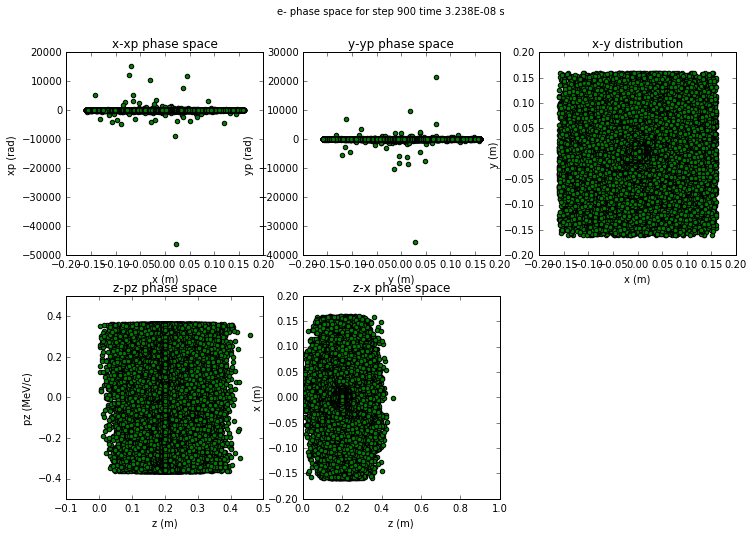

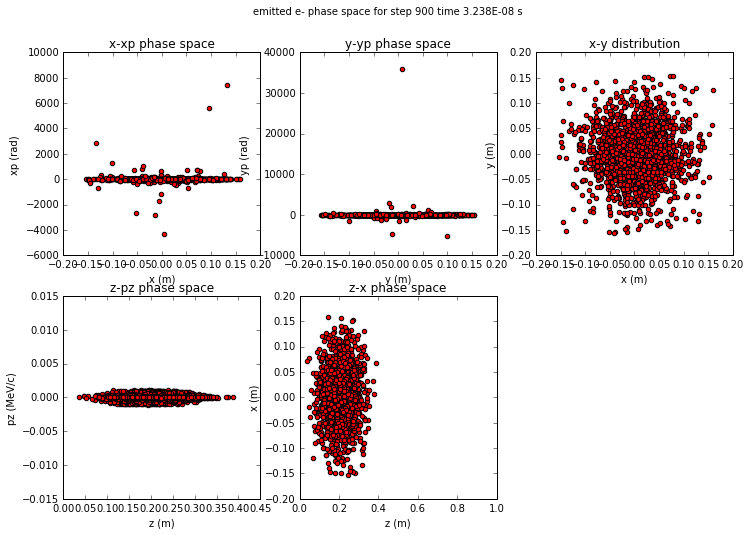

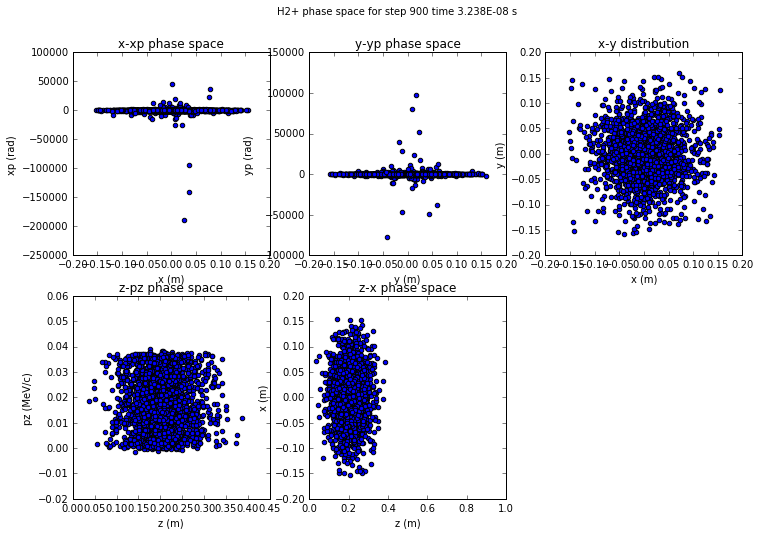

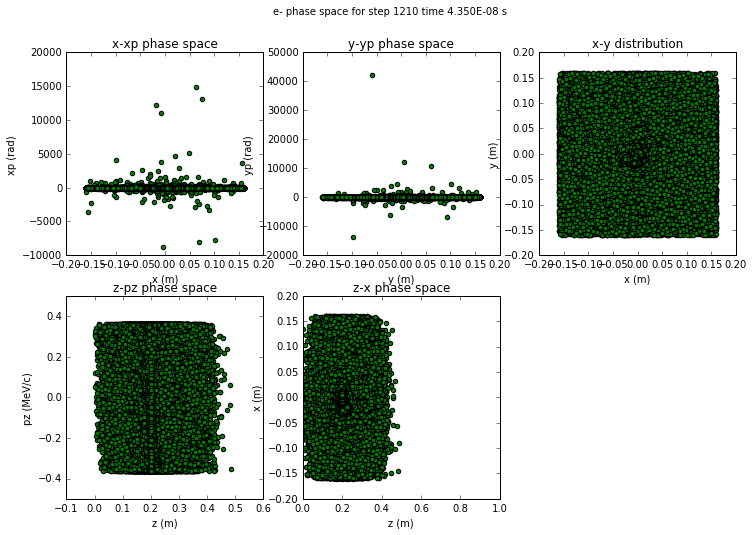

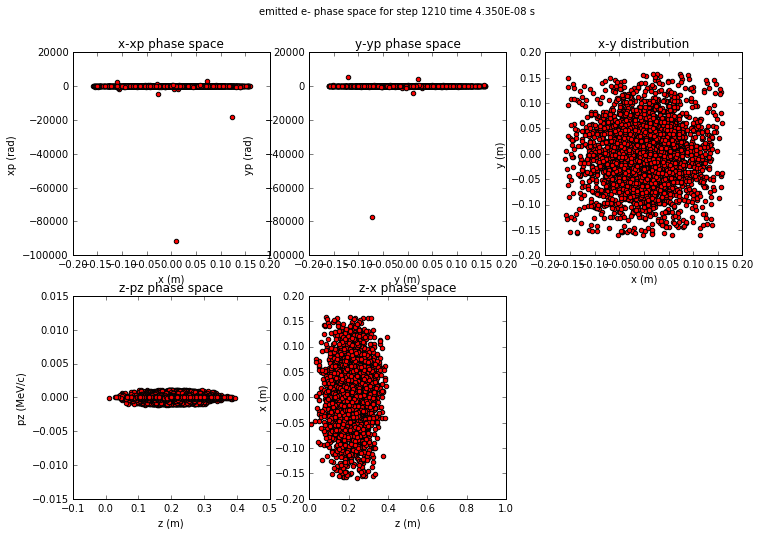

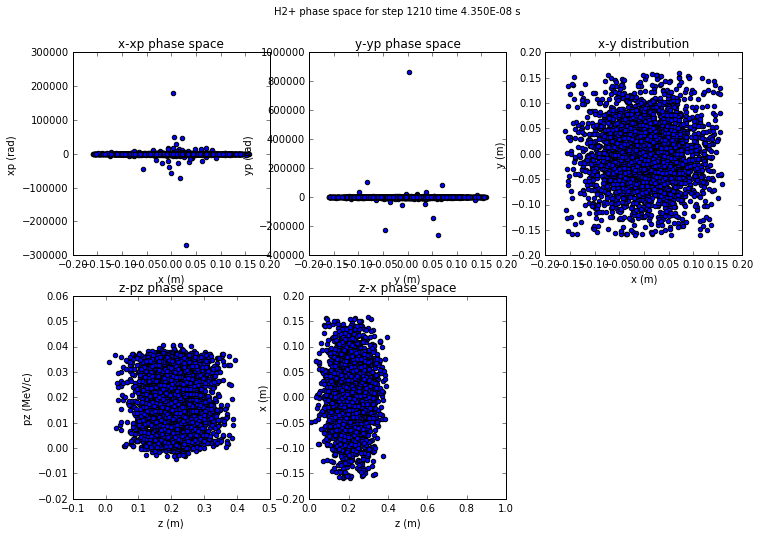

In [43]:
figs = []
def plotDecorate(fig,name):
    fig.suptitle("%s phase space for step %i time %.3E s" % (name,filteredsteps[i],times[i]))
    fig.axes[4].set_xlim(0.0,1.0) # z limits

for i in range(0,len(filteredsteps)):
    for d in [
        {'data': elecdata[i], 'color': 'g', 'name': 'e-', 'fraction': 0.33},
        {'data': emitelecdata[i], 'color': 'r', 'name': 'emitted e-', 'fraction': 1.0},
        {'data': h2pdata[i], 'color': 'b', 'name': 'H2+', 'fraction': 1.0},
    ]:
        data = d['data']
        if len(data) > 0:
            fraction = d['fraction']
            mask = np.random.choice([False, True], len(data), p=[1 - fraction, fraction])
            # print("Showing %i particles out of %i for case %s" % (sum(mask),len(data),d['name']))
            figs.append(plotphasespace(data[mask,:], color=d['color'], decorator=lambda fig: plotDecorate(fig,d['name'])))

In [100]:
%matplotlib inline
f0 = h5py.File('efield00050.h5', 'r')

xi = f0['mesh/x']
yi = f0['mesh/y']
zi = f0['mesh/z']

phi = f0['potential/electric']
efields = f0['fields/electric']

In [ ]:
numslices = 3 # number of interior slices (edges automatically given)
for i in range(0,len(zi),(len(zi)//(numslices+1))):
    plt.contourf(xi,yi,phi[:,:,i],cmap=plt.cm.viridis)
    plt.title("$\phi$ for z=%.2E m" % zi[i])
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.colorbar()
    plt.show()
    dims = ['x','y','z']
    fig = plt.figure(figsize=(12,4))
    for j in range(0,3):
        ax = plt.subplot(1,3,j+1)
        ax.contourf(xi,yi,efields[j,:,:,i],cmap=plt.cm.hot)
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        ax.set_title("$E_%s$ for z=%.2E m" % (dims[j],zi[i]))
        cax = ax.imshow(efields[j,:,:,i],cmap=plt.cm.hot)
        cbar = fig.colorbar(cax)
    plt.tight_layout()
    plt.show()
    

In [48]:
%matplotlib inline
# f0 = h5py.File('diags/fields/magnetic/bfield00614.h5', 'r')
f0 = h5py.File('diags/fields/magnetic/bfield01300.h5', 'r')

xi = f0['mesh/x']
yi = f0['mesh/y']
zi = f0['mesh/z']

a = f0['potential/vector']
bfields = f0['fields/magnetic']

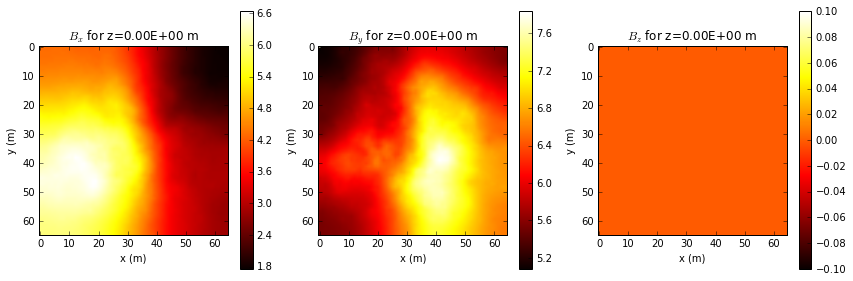

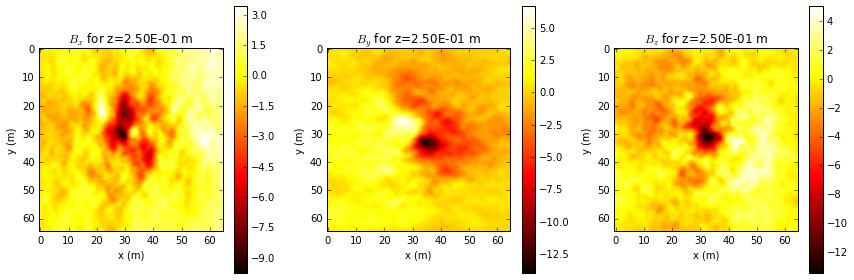

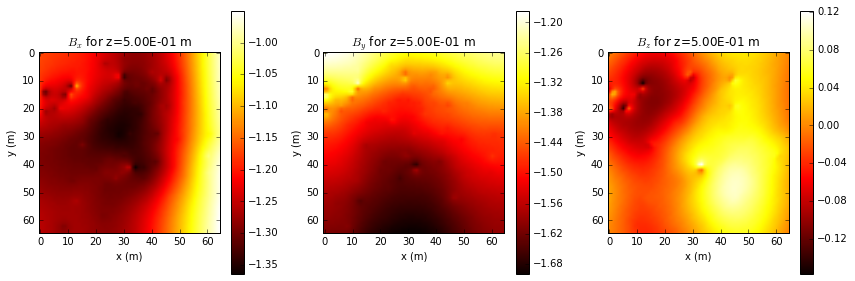

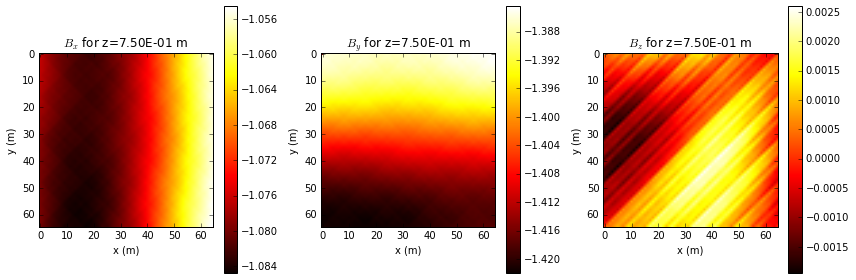

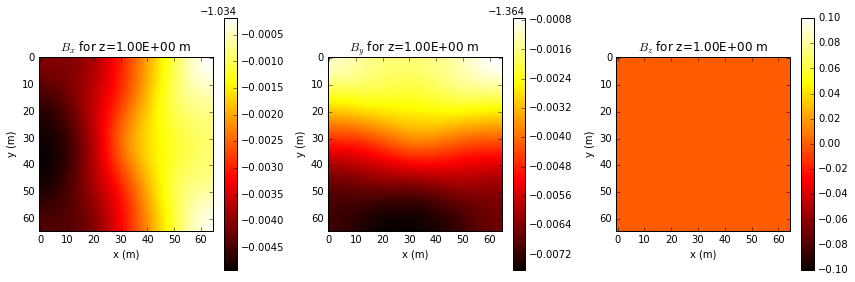

In [49]:
numslices = 3 # number of interior slices (edges automatically given)
for i in range(0,len(zi),(len(zi)//(numslices+1))):
    dims = ['x','y','z']
    fig = plt.figure(figsize=(12,4))
    for j in range(0,3):
        ax = plt.subplot(1,3,j+1)
        ax.contourf(xi,yi,bfields[j,:,:,i],cmap=plt.cm.hot)
        ax.set_xlabel("x (m)")
        ax.set_ylabel("y (m)")
        ax.set_title("$B_%s$ for z=%.2E m" % (dims[j],zi[i]))
        cax = ax.imshow(bfields[j,:,:,i],cmap=plt.cm.hot)
        cbar = fig.colorbar(cax)
    plt.tight_layout()
    plt.show()
    